# Project 3 - Evolution of the French Population
### Charlotte Bacchetta: cmb2374
This notebook studies the evolution of the French population from 1975 to the present, focusing on the distribution across different age categories and the impact of net migration trends. The analysis is based on official datasets provided by l'Institut National de la Statistique et des Études Économiques (INSEE), the French national institute responsible for collecting, analyzing, and disseminating statistical data about France's economy, demographics, and society. INSEE's data is widely regarded as authoritative and is used to inform public policy and academic research. The study aims to provide a robust and comprehensive analysis of demographic shifts and migration patterns over the past 50 years.

## Prompt
**Dataset(s) to be used:**
- Population as of January 1st - Total - Under 20 years old - Metropolitan France: https://www.insee.fr/fr/statistiques/serie/001686809
- Population as of January 1st - Total - Aged 20 to 59 years - Metropolitan France: https://www.insee.fr/fr/statistiques/serie/001686810
- Population as of January 1st - Total - Aged 75 years and over - Metropolitan France: https://www.insee.fr/fr/statistiques/serie/001686812
- Demographics - Population - Metropolitan France: https://www.insee.fr/fr/statistiques/serie/000436387
- Demographics - Estimated net migration - Metropolitan France: https://www.insee.fr/fr/statistiques/serie/001002693

**Analysis question:**
How has the French population evolved across different age categories from 1975 to the present, and what are the implications of net migration trends?

**Columns that will (likely) be used:**
- Year
- Population (0-20)
- Population (20-59)
- Population (60-74) - To be computed
- Population (75+)
- Total Population
- Net Migration

**Columns to be used to merge/join datasets:**
- All datasets will be merged on 'Year'.

**Hypothesis:**
The French population shows significant demographic shifts, with increasing numbers in older age categories, driven by aging trends and influenced by net migration.

**Site URL:**
Add your Read the Docs URL here after publishing.

## Step 1: Data Collection

In [65]:
# Import necessary libraries
import pandas as pd

# File path for datasets
base_path = "/Users/charlottebacchetta/Desktop/Columbia/Computing in Context - U6006/Project 3/Data Set/"

# File paths
file_paths = {
    "total_population": base_path + "French_Population_1975_Present.csv",
    "pop_0_to_20": base_path + "0_to_20_pop.csv",
    "pop_20_to_59": base_path + "20_to_59.csv",
    "pop_75_plus": base_path + "75plus_pop.csv",
    "net_migration": base_path + "Net_Migration_1946_Present.csv"
}

# Load datasets into pandas DataFrames
df_total_population = pd.read_csv(file_paths["total_population"])
df_pop_0_to_20 = pd.read_csv(file_paths["pop_0_to_20"])
df_pop_20_to_59 = pd.read_csv(file_paths["pop_20_to_59"])
df_pop_75_plus = pd.read_csv(file_paths["pop_75_plus"])
df_net_migration = pd.read_csv(file_paths["net_migration"])


## Step 2: Data Inspection

In [66]:
# Inspect datasets
print(df_total_population.head())
print(df_pop_0_to_20.head())
print(df_pop_20_to_59.head())
print(df_pop_75_plus.head())
print(df_net_migration.head())


  Libellé;"Démographie - Population au début du mois - France métropolitaine";"Codes"
0                              idBank;"000436387";""                                 
1         Dernière mise à jour;"29/11/2024 12:00";""                                 
2                                      Période;"";""                                 
3                                2024-11;"66313";"P"                                 
4                                2024-10;"66297";"P"                                 
  Libellé;"Population au 1er janvier - Ensemble - Moins de 20 ans - France métropolitaine";"Codes"
0                              idBank;"001686809";""                                              
1         Dernière mise à jour;"16/01/2024 12:00";""                                              
2                                      Période;"";""                                              
3                                2024;"15222363";"P"                                    

### Observation:
1) We notice that the data is in French (I'm assuming you are a bit lost!) so I need to translate column names so that you can understand what's going on. 

2) We see that the first few rows of the file contain metadata which is irrelevant to our analysis (e.g., description, update date) so we disregard it. We only want the population number and the year.

## Step 3: Data Cleaning

In [67]:
# Load datasets with proper delimiter and skip metadata rows
df_total_population = pd.read_csv(file_paths["total_population"], delimiter=";", skiprows=3)
df_pop_0_to_20 = pd.read_csv(file_paths["pop_0_to_20"], delimiter=";", skiprows=3)
df_pop_20_to_59 = pd.read_csv(file_paths["pop_20_to_59"], delimiter=";", skiprows=3)
df_pop_75_plus = pd.read_csv(file_paths["pop_75_plus"], delimiter=";", skiprows=3)
df_net_migration = pd.read_csv(file_paths["net_migration"], delimiter=";", skiprows=3)

# Assign clear English column names based on dataset structure
df_total_population.columns = ["Year", "Total Population", "Data Type"]
df_pop_0_to_20.columns = ["Year", "Population (0-20)", "Data Type"]
df_pop_20_to_59.columns = ["Year", "Population (20-59)", "Data Type"]
df_pop_75_plus.columns = ["Year", "Population (75+)", "Data Type"]
df_net_migration.columns = ["Year", "Net Migration", "Data Type"]

# Retain only 'Year' and the relevant column
df_total_population = df_total_population[["Year", "Total Population"]]
df_pop_0_to_20 = df_pop_0_to_20[["Year", "Population (0-20)"]]
df_pop_20_to_59 = df_pop_20_to_59[["Year", "Population (20-59)"]]
df_pop_75_plus = df_pop_75_plus[["Year", "Population (75+)"]]
df_net_migration = df_net_migration[["Year", "Net Migration"]]

# Inspect cleaned datasets
print(df_total_population.head())
print(df_pop_0_to_20.head())
print(df_pop_20_to_59.head())
print(df_pop_75_plus.head())
print(df_net_migration.head())


      Year  Total Population
0  2024-11             66313
1  2024-10             66297
2  2024-09             66276
3  2024-08             66254
4  2024-07             66231
   Year  Population (0-20)
0  2024           15222363
1  2023           15297453
2  2022           15355494
3  2021           15417227
4  2020           15512858
   Year  Population (20-59)
0  2024            32402690
1  2023            32425155
2  2022            32410370
3  2021            32395954
4  2020            32303266
   Year  Population (75+)
0  2024           6968892
1  2023           6697135
2  2022           6467397
3  2021           6253682
4  2020           6223555
   Year  Net Migration
0  2023         193000
1  2022         193000
2  2021         193000
3  2020         227847
4  2019         139849


### 1- Observation:
As we know that the French population is around 65 million people, we notice that the Total Population is expressed in thousands. This means the actual population is the current number x1000.

Because we plan on calculating ratios, I will express the Total Population by headcount.


In [68]:
# Convert Total Population from thousands to headcount
df_total_population["Total Population"] = df_total_population["Total Population"] * 1000

# Inspect the updated DataFrame
print(df_total_population.head())

      Year  Total Population
0  2024-11          66313000
1  2024-10          66297000
2  2024-09          66276000
3  2024-08          66254000
4  2024-07          66231000


### 2- Observation:

Total Population data is given monthly and not yearly, therefore we will only keep the population number for the month of january (as it is the reference point for the other datasets).


In [71]:
# Convert 'Year' to string to ensure compatibility with .str methods
df_total_population["Year"] = df_total_population["Year"].astype(str)

# Extract valid 4-digit years from the 'Year' column
df_total_population["Year"] = df_total_population["Year"].str.extract(r"(\d{4})")

# Convert the cleaned 'Year' column to integer
df_total_population["Year"] = df_total_population["Year"].astype(int)

# Sort the dataset by date to ensure the earliest data point for each year comes first
df_total_population = df_total_population.sort_values(by=["Year"])

# Drop duplicates based on 'Year', keeping only the first occurrence
df_total_population = df_total_population.drop_duplicates(subset=["Year"])

# Reset the index after filtering
df_total_population = df_total_population.reset_index(drop=True)

# Inspect the filtered dataset
print("Filtered Total Population dataset (first record for each year) with reset indices:")
print(df_total_population.head())

Filtered Total Population dataset (first record for each year) with reset indices:
   Year  Total Population
0  1975          52600000
1  1976          53004000
2  1977          53258000
3  1978          53419000
4  1979          53714000


In [72]:
# Function to check the year range for a dataset
def check_year_range(df, dataset_name):
    print(f"Year range for {dataset_name}:")
    print(f"Start Year: {df['Year'].min()}, End Year: {df['Year'].max()}")
    print("--------------------------------")

# Check year range for each dataset
check_year_range(df_total_population, "Total Population")
check_year_range(df_pop_0_to_20, "Population (0-20)")
check_year_range(df_pop_20_to_59, "Population (20-59)")
check_year_range(df_pop_75_plus, "Population (75+)")
check_year_range(df_net_migration, "Net Migration")

Year range for Total Population:
Start Year: 1975, End Year: 2024
--------------------------------
Year range for Population (0-20):
Start Year: 1946, End Year: 2024
--------------------------------
Year range for Population (20-59):
Start Year: 1946, End Year: 2024
--------------------------------
Year range for Population (75+):
Start Year: 1946, End Year: 2024
--------------------------------
Year range for Net Migration:
Start Year: 1946, End Year: 2023
--------------------------------


### Observation:

As our analysis is focused on the last 50 years, we will disregard data before 1975.

In [74]:
# Function to filter data for years >= 1975
def filter_years(df, dataset_name):
    filtered_df = df[df["Year"] >= 1975]
    print(f"{dataset_name} filtered to include only years from 1975 onwards:")
    print(filtered_df.head())
    print("--------------------------------")
    return filtered_df

# Apply the filter to each dataset
df_total_population = filter_years(df_total_population, "Total Population")
df_pop_0_to_20 = filter_years(df_pop_0_to_20, "Population (0-20)")
df_pop_20_to_59 = filter_years(df_pop_20_to_59, "Population (20-59)")
df_pop_75_plus = filter_years(df_pop_75_plus, "Population (75+)")
df_net_migration = filter_years(df_net_migration, "Net Migration")

Total Population filtered to include only years from 1975 onwards:
   Year  Total Population
0  1975          52600000
1  1976          53004000
2  1977          53258000
3  1978          53419000
4  1979          53714000
--------------------------------
Population (0-20) filtered to include only years from 1975 onwards:
   Year  Population (0-20)
0  2024           15222363
1  2023           15297453
2  2022           15355494
3  2021           15417227
4  2020           15512858
--------------------------------
Population (20-59) filtered to include only years from 1975 onwards:
   Year  Population (20-59)
0  2024            32402690
1  2023            32425155
2  2022            32410370
3  2021            32395954
4  2020            32303266
--------------------------------
Population (75+) filtered to include only years from 1975 onwards:
   Year  Population (75+)
0  2024           6968892
1  2023           6697135
2  2022           6467397
3  2021           6253682
4  2020       

### Observation:

We notice Migration data stops in 2023 (keep in mind).

In [75]:
# Define a function to check for issues in a dataset
def inspect_data(df, dataset_name):
    print(f"Dataset: {dataset_name}")
    # Check data types
    print("\nData Types:")
    print(df.dtypes)
    
    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Check for negative values in population columns
    population_columns = [col for col in df.columns if "Population" in col or "Net Migration" in col]
    if population_columns:
        print("\nNegative Values in Population Columns:")
        print(df[population_columns].lt(0).sum())
    else:
        print("\nNo Population Columns Detected")
    
    print("\n--------------------------------\n")

# Inspect each dataset
inspect_data(df_total_population, "Total Population")
inspect_data(df_pop_0_to_20, "Population (0-20)")
inspect_data(df_pop_20_to_59, "Population (20-59)")
inspect_data(df_pop_75_plus, "Population (75+)")
inspect_data(df_net_migration, "Net Migration")

Dataset: Total Population

Data Types:
Year                int64
Total Population    int64
dtype: object

Missing Values:
Year                0
Total Population    0
dtype: int64

Negative Values in Population Columns:
Total Population    0
dtype: int64

--------------------------------

Dataset: Population (0-20)

Data Types:
Year                 int64
Population (0-20)    int64
dtype: object

Missing Values:
Year                 0
Population (0-20)    0
dtype: int64

Negative Values in Population Columns:
Population (0-20)    0
dtype: int64

--------------------------------

Dataset: Population (20-59)

Data Types:
Year                  int64
Population (20-59)    int64
dtype: object

Missing Values:
Year                  0
Population (20-59)    0
dtype: int64

Negative Values in Population Columns:
Population (20-59)    0
dtype: int64

--------------------------------

Dataset: Population (75+)

Data Types:
Year                int64
Population (75+)    int64
dtype: object

Missing V

### Observation:

We observe that there are no missing or incoherent values. As l'INSEE is known to publish qualitative datasets, this seerved as a straightforward verification step. 

WE ARE NOW READY TO MERGE DATASETS !!! YAYYYY !

## Step 4: Data Transformation

In [76]:
# Merge datasets on 'Year'
merged_df = df_total_population.merge(df_pop_0_to_20, on="Year", how="inner") \
                               .merge(df_pop_20_to_59, on="Year", how="inner") \
                               .merge(df_pop_75_plus, on="Year", how="inner")

# Calculate Population (60-74)
merged_df["Population (60-74)"] = (
    merged_df["Total Population"]
    - (merged_df["Population (0-20)"] + merged_df["Population (20-59)"] + merged_df["Population (75+)"])
)

# Select final columns
final_df = merged_df[["Year", "Total Population", "Population (0-20)", "Population (20-59)", "Population (60-74)", "Population (75+)"]]

# Inspect the final DataFrame
print("Merged and Processed Dataset:")
print(final_df.head())

Merged and Processed Dataset:
   Year  Total Population  Population (0-20)  Population (20-59)  \
0  1975          52600000           16888065            26039628   
1  1976          53004000           16809211            26405010   
2  1977          53258000           16703587            26891695   
3  1978          53419000           16612734            27358707   
4  1979          53714000           16510923            27766228   

   Population (60-74)  Population (75+)  
0             7015885           2656422  
1             7067245           2722534  
2             6852221           2810497  
3             6537012           2910547  
4             6443459           2993390  


In [78]:
# Create a new DataFrame with Year and proportions of each category
proportions_df = final_df.copy()

# Calculate proportions for each population category
proportions_df["Proportion (0-20)"] = (proportions_df["Population (0-20)"] / proportions_df["Total Population"]) * 100
proportions_df["Proportion (20-59)"] = (proportions_df["Population (20-59)"] / proportions_df["Total Population"]) * 100
proportions_df["Proportion (60-74)"] = (proportions_df["Population (60-74)"] / proportions_df["Total Population"]) * 100
proportions_df["Proportion (75+)"] = (proportions_df["Population (75+)"] / proportions_df["Total Population"]) * 100

# Add Net Migration as a proportion of the total population
proportions_df = proportions_df.merge(df_net_migration, on="Year", how="inner")
proportions_df["Proportion (Net Migration)"] = (proportions_df["Net Migration"] / proportions_df["Total Population"]) * 100

# Truncate all proportions to the nearest tenth
proportions_df["Proportion (0-20)"] = proportions_df["Proportion (0-20)"].round(1)
proportions_df["Proportion (20-59)"] = proportions_df["Proportion (20-59)"].round(1)
proportions_df["Proportion (60-74)"] = proportions_df["Proportion (60-74)"].round(1)
proportions_df["Proportion (75+)"] = proportions_df["Proportion (75+)"].round(1)
proportions_df["Proportion (Net Migration)"] = proportions_df["Proportion (Net Migration)"].round(1)

# Keep only relevant columns
proportions_df = proportions_df[[
    "Year",
    "Proportion (0-20)",
    "Proportion (20-59)",
    "Proportion (60-74)",
    "Proportion (75+)",
    "Proportion (Net Migration)"
]]

# Inspect the new DataFrame
print("Proportions DataFrame with Rounded Values:")
print(proportions_df.head())


Proportions DataFrame with Rounded Values:
   Year  Proportion (0-20)  Proportion (20-59)  Proportion (60-74)  \
0  1975               32.1                49.5                13.3   
1  1976               31.7                49.8                13.3   
2  1977               31.4                50.5                12.9   
3  1978               31.1                51.2                12.2   
4  1979               30.7                51.7                12.0   

   Proportion (75+)  Proportion (Net Migration)  
0               5.1                         0.0  
1               5.1                         0.1  
2               5.3                         0.1  
3               5.4                         0.0  
4               5.6                         0.1  


## Step 5: Data Visualization

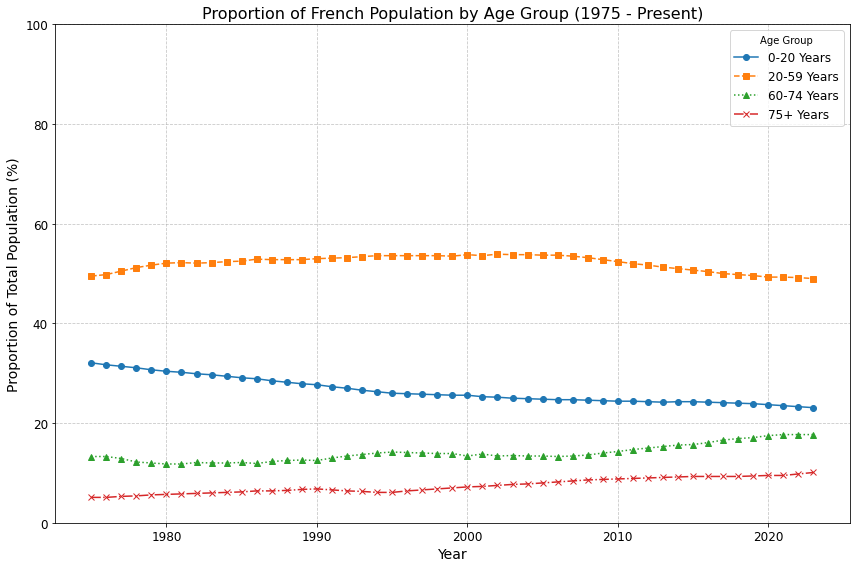

In [79]:
import matplotlib.pyplot as plt

# Plot proportions for each age group
plt.figure(figsize=(12, 8))

# Plot each age group proportion
plt.plot(proportions_df["Year"], proportions_df["Proportion (0-20)"], label="0-20 Years", linestyle="-", marker="o")
plt.plot(proportions_df["Year"], proportions_df["Proportion (20-59)"], label="20-59 Years", linestyle="--", marker="s")
plt.plot(proportions_df["Year"], proportions_df["Proportion (60-74)"], label="60-74 Years", linestyle=":", marker="^")
plt.plot(proportions_df["Year"], proportions_df["Proportion (75+)"], label="75+ Years", linestyle="-.", marker="x")

# Add title, labels, and legend
plt.title("Proportion of French Population by Age Group (1975 - Present)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Proportion of Total Population (%)", fontsize=14)
plt.legend(title="Age Group", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust axis limits
plt.ylim(0, 100)  # Population proportions are percentages
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Observation:

#### Age Group 0-20 Years:

There is a declining trend in the proportion of the population aged 0-20 years over the years, indicating a lower birth rate or reduced younger population share relative to the total population.

#### Age Group 20-59 Years:

The proportion of the working-age population (20-59 years) shows stability with slight fluctuations, peaking during some years. This indicates relative constancy in the core working population's share.

#### Age Group 60-74 Years:

There is a slight increase in the proportion of the 60-74 age group, reflecting the effects of an aging population as life expectancy increases.

#### Age Group 75+ Years:

A steady increase is evident in the proportion of the population aged 75 years and above. This trend highlights an aging population and potentially reflects improved healthcare and longevity.

### Public Policy Implications :

The chart shows a shift toward an older population structure, with a declining younger population (0-20 years) and an increasing elderly population (60+ years). These trends have implications for public policy, particularly in areas like:

#### Healthcare:

Increased demand for geriatric care, chronic disease management, and long-term care services.
Higher healthcare expenditures to address age-related conditions like dementia, cardiovascular diseases, and mobility issues.
Need for healthcare infrastructure and workforce expansion to cater to an aging population.

#### Pensions and Social Security:

Strain on pension systems as a growing proportion of the population becomes eligible for retirement benefits.
Possible reforms, such as increasing the retirement age or adjusting contribution rates, to ensure the sustainability of pension funds.
Encouragement of private savings or pension schemes to reduce dependence on state-funded systems.

#### Workforce Planning:

Potential labor shortages due to a shrinking proportion of the working-age population (20-59 years).
Increased focus on policies promoting workforce participation, such as retraining programs for older workers and support for working parents to balance family and career responsibilities.
Consideration of immigration policies to supplement labor shortages and sustain economic growth.

#### Education and Youth Policies:

Adjustments in educational investments as the younger population declines, potentially redirecting resources to other demographic groups.
Policies to encourage higher birth rates, such as family-friendly policies, affordable childcare, and parental leave benefits.

#### Economic Growth and Productivity:

Challenges to economic productivity as the ratio of dependents (non-working population) to the working-age population increases.
Opportunities for automation and technological innovation to offset labor shortages and enhance productivity.

## Step 6: Analyze Net Migration

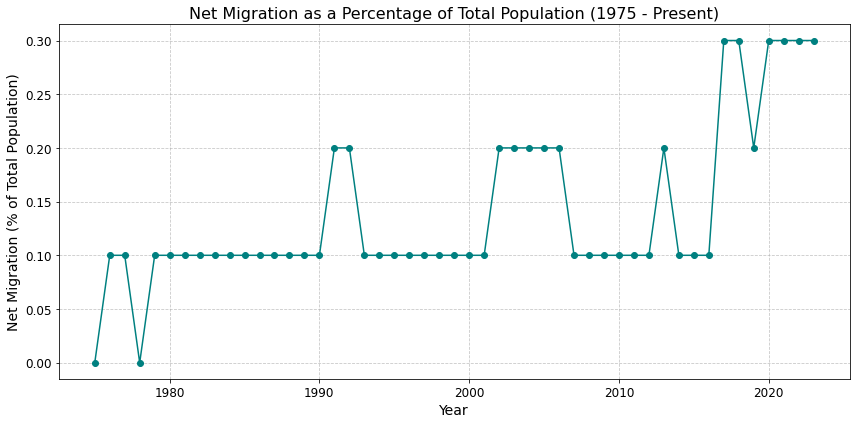

In [80]:
import matplotlib.pyplot as plt

# Create a new column for Net Migration as a percentage of the total population
proportions_df["Net Migration (%)"] = proportions_df["Proportion (Net Migration)"]

# Plot Net Migration over the years
plt.figure(figsize=(12, 6))
plt.plot(proportions_df["Year"], proportions_df["Net Migration (%)"], linestyle="-", marker="o", color="teal")

# Add title and labels
plt.title("Net Migration as a Percentage of Total Population (1975 - Present)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Net Migration (% of Total Population)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### Observation:

#### Early Stability (1975-1980s):

During this period, net migration remained low and stable, around 0%-0.1% of the total population.

Historical Context:
The 1973 oil crisis and subsequent global economic slowdown led France to adopt restrictive immigration policies, particularly targeting guest workers from former colonies in North Africa (e.g., Algeria, Morocco, Tunisia).
These policies, coupled with family reunification laws, stabilized migration flows, with fewer new arrivals and more focus on integrating existing immigrant populations.

#### First Spike in Net Migration (Late 1980s):

The late 1980s saw a sharp increase in net migration, reaching notable peaks during this time.
Historical Context:
The 1981 election of François Mitterrand marked a shift toward more progressive immigration policies, including amnesties for undocumented migrants.
France also began experiencing migration from Sub-Saharan Africa, driven by economic hardships and political instability in newly independent African states.
European integration during this time (e.g., the Schengen Agreement in 1985) facilitated freer movement within Europe, likely contributing to increased migration.

#### Stabilization and New Spike (1990s-2000s):

Migration trends stabilized in the 1990s but spiked again in the early 2000s.
Historical Context:
The 1990s saw conflicts in the Balkans (e.g., Bosnia, Kosovo) leading to a wave of refugees entering Western Europe, including France.
Economic growth in the late 1990s and early 2000s likely attracted labor migrants, particularly from Eastern Europe following the 1995 EU expansion.
France also passed new immigration laws, including the 1998 Chevènement law, which aimed to simplify residency rights and encourage family reunification.

#### Recent Sustained Increase (Post-2015):

From the mid-2010s, there is a sustained and sharp increase in net migration, stabilizing around 0.3% of the total population.
Historical Context:
The 2015 European migrant crisis, driven by conflicts in Syria, Afghanistan, and Africa, led to a dramatic increase in asylum seekers across Europe, including France.
France became a key destination for refugees and economic migrants, partly due to its colonial ties with African and Middle Eastern countries.
Immigration policies, such as accepting a quota of asylum seekers under EU redistribution agreements, likely contributed to this trend.

#### Periods of Zero Net Migration:

Several years show net migration close to 0%, likely reflecting balanced inflows and outflows or data inconsistencies.
Historical Context:
These periods may coincide with restrictive immigration policies or temporary economic downturns (e.g., the 2008 financial crisis) that reduced France’s attractiveness to migrants.


## Step 7: Conclusion

### Implications for France

#### Demographic Challenges:

With France's aging population and declining birth rates, the sustained increase in migration post-2015 highlights its role in addressing labor shortages and population decline.
Migration has been a critical factor in maintaining population growth and economic productivity.

#### Social Integration:

The rapid spikes in migration during certain periods (e.g., 2015) likely placed pressure on housing, education, and healthcare systems.
Ensuring long-term social cohesion requires robust integration policies, particularly in urban centers with high immigrant populations.

#### Geopolitical Role:

France’s historical ties to Africa and the Middle East position it as a natural destination for migrants from these regions. This emphasizes France’s role in addressing global migration issues, particularly in collaboration with the EU.